# Linear Regression Implementation

This notebook implements a linear regression model from scratch. It includes data loading, preprocessing, model training, and evaluation.

Mean Squared Error: 1.922303606874547e-18
R^2 Score: 1.0


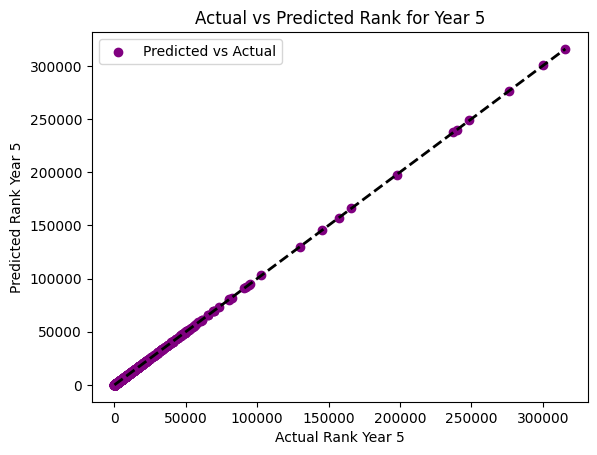

In [5]:
# ...existing code...
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Adjust the path to point to the directory containing 'src'
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))
from linear_regression import LinearRegression

# Load dataset
data = pd.read_csv('lr_train.csv')  # Ensure this file has the correct columns

data = data.T.fillna(data.mean(axis=1)).T

X = data[['2021', '2022', '2023', '2024']].values  # Features: ranks of years 1-4
y = data['predicted'].values  # Target: rank of year 5

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the results
plt.scatter(y_test, y_pred, color='purple', label='Predicted vs Actual')
plt.xlabel('Actual Rank Year 5')
plt.ylabel('Predicted Rank Year 5')
plt.title('Actual vs Predicted Rank for Year 5')
plt.legend()
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()
# ...existing code...

Mean Squared Error: 38601496.46387478
R^2 Score: 0.9474649615801873


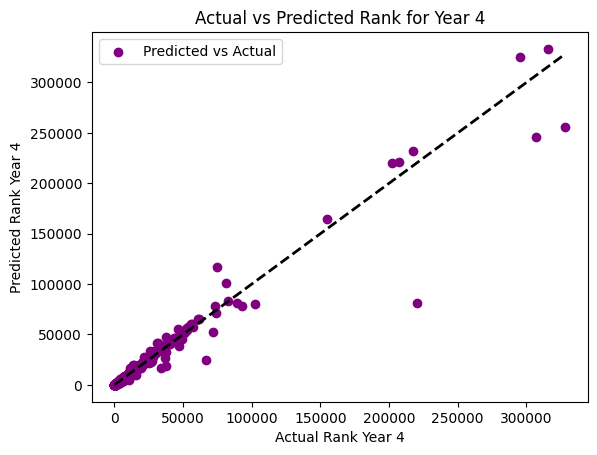

In [7]:
# ...existing code...

# Load dataset
data = pd.read_csv('lr_train.csv')  # Ensure this file has the correct columns

# Replace NaN values with the mean of each row
data = data.T.fillna(data.mean(axis=1)).T

# Use first 3 years as features, year 4 as target
X = data[['2021', '2022', '2023']].values  # Features: ranks of years 1-3
y = data['2024'].values  # Target: rank of year 4

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=22)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the results
plt.scatter(y_test, y_pred, color='purple', label='Predicted vs Actual')
plt.xlabel('Actual Rank Year 4')
plt.ylabel('Predicted Rank Year 4')
plt.title('Actual vs Predicted Rank for Year 4')
plt.legend()
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()
# ...existing code...

In [8]:
from scipy.stats import zscore
z_scores = np.abs(zscore(data[['2021', '2022', '2023', '2024', '2024']]))
outliers = (z_scores > 3).any(axis=1)
print("Outliers detected in the dataset:")
print(data[outliers])

Outliers detected in the dataset:
          2021      2022      2023           2024      predicted
2466   96223.0  111124.0   54305.0   67216.000000   82217.000000
2467   65794.0   99644.0   61095.0   75511.000000   75511.000000
2469  228884.0   73949.0   53248.0   81089.000000  109292.500000
2470  106434.0   86844.0   45325.0   79534.333333   79534.333333
2502   63800.0  101911.0   57205.0   74305.333333   74305.333333
...        ...       ...       ...            ...            ...
5567  538608.0  302098.0  286182.0  367592.000000  373620.000000
6501   82391.0   81621.0   58064.0   92779.000000   78713.750000
6521   90654.0   92020.0   70324.0  110525.000000   90880.750000
6526   85134.0   81283.0   63845.0   89448.000000   79927.500000
6531   85321.0   81357.0   63873.0   94248.000000   81199.750000

[115 rows x 5 columns]


In [9]:
# ...existing code...

# Identify outliers using Z-score method
from scipy.stats import zscore
z_scores = np.abs(zscore(data[['2021', '2022', '2023', '2024']]))
outliers = (z_scores > 3).any(axis=1)

# Remove outliers
clean_data = data[~outliers].reset_index(drop=True)

# Show the cleaned table
print("Cleaned data without outliers:")
display(clean_data)

# Now you can use 'clean_data' for model training
# Example:
X_clean = clean_data[['2021', '2022', '2023']].values
y_clean = clean_data['2024'].values

# Check if all outliers have been removed from the cleaned data
from scipy.stats import zscore
z_scores_clean = np.abs(zscore(clean_data[['2021', '2022', '2023', '2024']]))
if (z_scores_clean > 3).any().any():
    print("Some outliers remain in the cleaned data.")
else:
    print("All outliers have been successfully removed.")

# ...existing code...

Cleaned data without outliers:


,2021,2022,2023,2024,predicted
0,12396.0,13624.0,12911.0,14782.000000,13428.250000
1,21029.0,21674.0,19272.0,20658.333333,20658.333333
2,1760.0,2171.0,1977.0,2267.000000,2043.750000
3,3536.0,3334.0,3056.0,3308.666667,3308.666667
4,4260.0,4615.0,4642.0,5231.000000,4687.000000
...,...,...,...,...,...
6422,340.0,340.0,340.0,340.000000,340.000000
6423,3731.0,3731.0,3731.0,3731.000000,3731.000000
6424,8374.0,8374.0,8374.0,8374.000000,8374.000000
6425,4341.0,4341.0,4341.0,4341.000000,4341.000000


Some outliers remain in the cleaned data.


Mean Squared Error: 85907399.21712343
R^2 Score: 0.8782654281721758


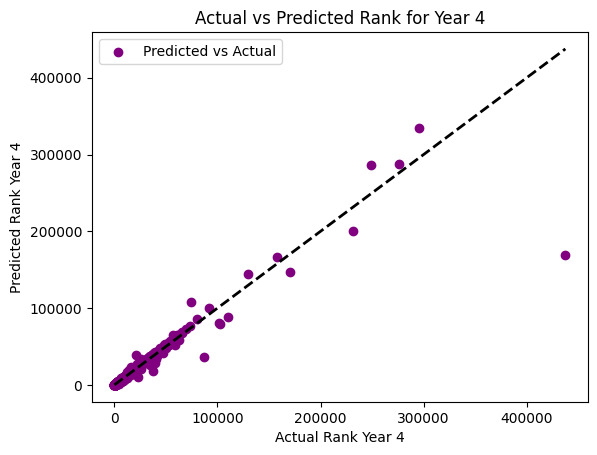

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the results
plt.scatter(y_test, y_pred, color='purple', label='Predicted vs Actual')
plt.xlabel('Actual Rank Year 4')
plt.ylabel('Predicted Rank Year 4')
plt.title('Actual vs Predicted Rank for Year 4')
plt.legend()
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()
# ...existing code...

In [10]:
from scipy.stats import zscore
z_scores_clean = np.abs(zscore(clean_data[['2021', '2022', '2023', '2024']]))
outlier = (z_scores_clean > 3).any(axis=1)
print("Outliers detected in the dataset:")
print(clean_data[outlier])

Outliers detected in the dataset:
         2021     2022     2023          2024     predicted
2469  47423.0  48939.0  35791.0  47967.000000  45030.000000
2470  49982.0  54373.0  39010.0  47788.333333  47788.333333
2479  61721.0  73857.0  49375.0  56585.000000  60384.500000
2480  53918.0  50198.0  43274.0  49130.000000  49130.000000
2483  75007.0  57562.0  43156.0  64555.000000  60070.000000
...       ...      ...      ...           ...           ...
6318  50543.0  52509.0  44670.0  53043.000000  50191.250000
6319  60460.0  62958.0  55075.0  59497.666667  59497.666667
6394  52635.0  49875.0  44677.0  58940.000000  51531.750000
6399  67331.0  68920.0  55399.0  79475.000000  67781.250000
6404  61633.0  59460.0  51001.0  63568.000000  58915.500000

[272 rows x 5 columns]


In [11]:
# Identify outliers in the cleaned data using Z-score method
outliers_clean = (z_scores_clean > 3).any(axis=1)

# Remove outliers from the cleaned data
clean_data_final = clean_data[~outliers_clean].reset_index(drop=True)

# Show the final cleaned table
print("Final cleaned data without outliers:")
display(clean_data_final)

# Verify if all outliers have been removed
z_scores_final = np.abs(zscore(clean_data_final[['2021', '2022', '2023', '2024']]))
if (z_scores_final > 3).any().any():
    print("Some outliers remain in the final cleaned data.")
else:
    print("All outliers have been successfully removed in the final cleaning step.")

Final cleaned data without outliers:


,2021,2022,2023,2024,predicted
0,12396.0,13624.0,12911.0,14782.000000,13428.250000
1,21029.0,21674.0,19272.0,20658.333333,20658.333333
2,1760.0,2171.0,1977.0,2267.000000,2043.750000
3,3536.0,3334.0,3056.0,3308.666667,3308.666667
4,4260.0,4615.0,4642.0,5231.000000,4687.000000
...,...,...,...,...,...
6150,340.0,340.0,340.0,340.000000,340.000000
6151,3731.0,3731.0,3731.0,3731.000000,3731.000000
6152,8374.0,8374.0,8374.0,8374.000000,8374.000000
6153,4341.0,4341.0,4341.0,4341.000000,4341.000000


Some outliers remain in the final cleaned data.


Mean Squared Error (Final): 2779680.826174214
R^2 Score (Final): 0.9578261738266596


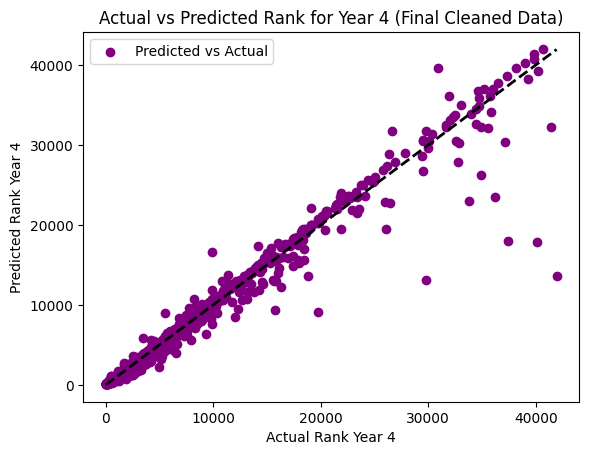

In [19]:
# Use the final cleaned data for training and testing
X_final = clean_data_final[['2021', '2022', '2023']].values
y_final = clean_data_final['2024'].values

# Split the final cleaned dataset into training and testing sets
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Initialize and train the model on the final cleaned data
model_final = LinearRegression()
model_final.fit(X_train_final, y_train_final)

# Make predictions on the test set
y_pred_final = model_final.predict(X_test_final)

# Evaluate the model
mse_final = mean_squared_error(y_test_final, y_pred_final)
r2_final = r2_score(y_test_final, y_pred_final)

# Print evaluation metrics
print(f'Mean Squared Error (Final): {mse_final}')
print(f'R^2 Score (Final): {r2_final}')

# Visualize the results
plt.scatter(y_test_final, y_pred_final, color='purple', label='Predicted vs Actual')
plt.xlabel('Actual Rank Year 4')
plt.ylabel('Predicted Rank Year 4')
plt.title('Actual vs Predicted Rank for Year 4 (Final Cleaned Data)')
plt.legend()
plt.plot([y_test_final.min(), y_test_final.max()], [y_test_final.min(), y_test_final.max()], 'k--', lw=2)
plt.show()

In [20]:
import joblib

# Save the trained model to a file
joblib.dump(model_final, 'linear_regression_model.pkl')

print("Model saved as 'linear_regression_model.pkl'")

Model saved as 'linear_regression_model.pkl'


In [13]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import numpy as np
import pandas as pd

# Load your cleaned data (replace with your actual file path)
data = clean_data_final  # Assuming cleaned_data_final is the DataFrame after outlier removal

from sklearn.impute import SimpleImputer

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(data[['2021', '2022', '2023']].values)
y = imputer.fit_transform(data[['2024']].values).ravel()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bayesian Ridge Regression model
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)

# Predict with uncertainty
y_pred, y_std = bayesian_model.predict(X_test, return_std=True)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (Bayesian): {mse}')
print(f'R^2 Score (Bayesian): {r2}')
# Print a few prediction samples with uncertainty
print('\nSample predictions (actual, predicted, std):')
for i in range(min(10, len(y_test))):
    print(f'Actual: {y_test[i]:.2f}, Predicted: {y_pred[i]:.2f}, Std: {y_std[i]:.2f}')


Mean Squared Error (Bayesian): 2779673.925999321
R^2 Score (Bayesian): 0.9578262785173758

Sample predictions (actual, predicted, std):
Actual: 14202.00, Predicted: 17370.53, Std: 1269.69
Actual: 10689.33, Predicted: 11181.38, Std: 1268.43
Actual: 31987.67, Predicted: 33158.54, Std: 1270.38
Actual: 1132.00, Predicted: 1102.37, Std: 1268.03
Actual: 12525.33, Predicted: 13096.15, Std: 1268.42
Actual: 18337.67, Predicted: 18177.39, Std: 1273.63
Actual: 9297.67, Predicted: 9708.00, Std: 1268.23
Actual: 7570.00, Predicted: 6274.58, Std: 1268.17
Actual: 6576.00, Predicted: 6885.27, Std: 1268.20
Actual: 199.00, Predicted: 303.26, Std: 1268.03


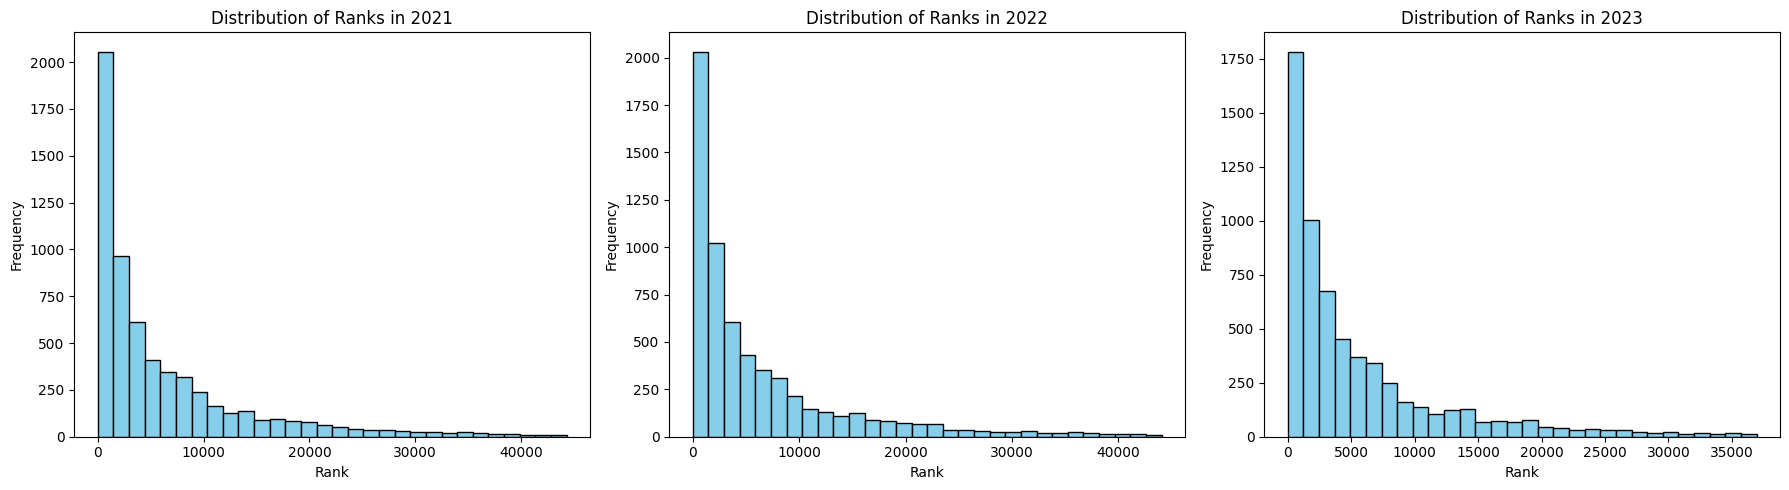

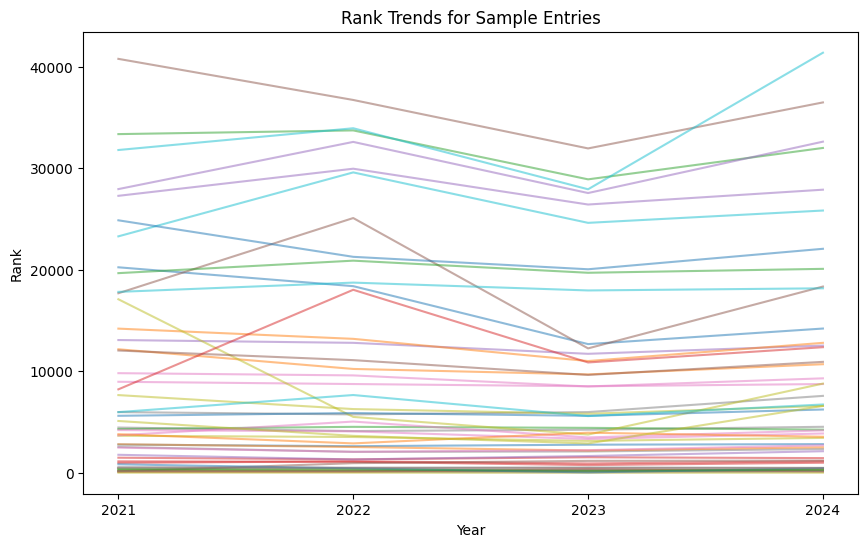

In [14]:
import matplotlib.pyplot as plt

# Plot the distribution of each year's rank
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
years = ['2021', '2022', '2023']
for i, year in enumerate(years):
    axes[i].hist(clean_data_final[year].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of Ranks in {year}')
    axes[i].set_xlabel('Rank')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot the trend of ranks for a sample of entries
plt.figure(figsize=(10, 6))
sample = clean_data_final.sample(n=min(50, len(clean_data_final)), random_state=42)
for idx, row in sample.iterrows():
    plt.plot(['2021', '2022', '2023', '2024'], [row['2021'], row['2022'], row['2023'], row['2024']], alpha=0.5)
plt.title('Rank Trends for Sample Entries')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.show()

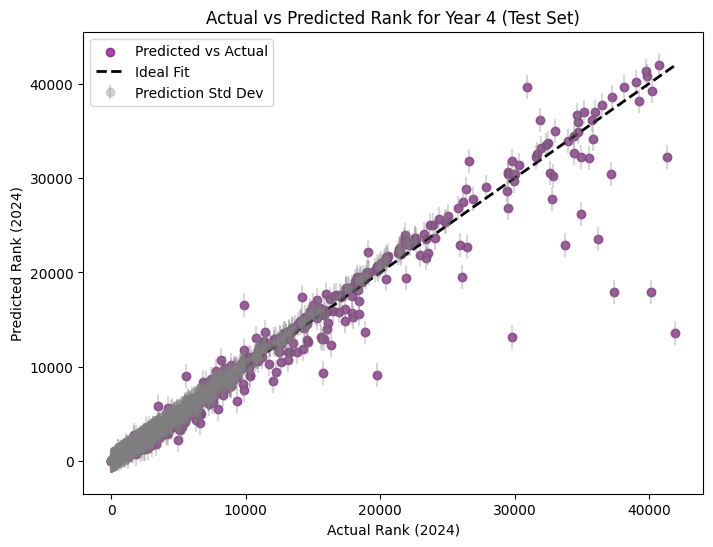

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.7, label='Predicted vs Actual')
plt.errorbar(y_test, y_pred, yerr=y_std, fmt='o', color='gray', alpha=0.3, label='Prediction Std Dev')
plt.xlabel('Actual Rank (2024)')
plt.ylabel('Predicted Rank (2024)')
plt.title('Actual vs Predicted Rank for Year 4 (Test Set)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Ideal Fit')
plt.legend()
plt.show()

In [16]:
import pandas as pd
import numpy as np

# Show 50 samples: actual, predicted, and std
num_samples = min(50, len(y_test))
print(f"{'Index':<5} {'Actual':>10} {'Predicted':>12} {'Std Dev':>10}")
print("-" * 40)
for i in range(num_samples):
    print(f"{i+1:<5} {y_test[i]:>10.2f} {y_pred[i]:>12.2f} {y_std[i]:>10.2f}")


Index     Actual    Predicted    Std Dev
----------------------------------------
1       14202.00     17370.53    1269.69
2       10689.33     11181.38    1268.43
3       31987.67     33158.54    1270.38
4        1132.00      1102.37    1268.03
5       12525.33     13096.15    1268.42
6       18337.67     18177.39    1273.63
7        9297.67      9708.00    1268.23
8        7570.00      6274.58    1268.17
9        6576.00      6885.27    1268.20
10        199.00       303.26    1268.03
11       2818.00      2929.42    1268.06
12      12793.67     13243.83    1268.47
13        278.00       273.37    1268.03
14        984.67      1063.77    1268.04
15        104.00       146.53    1268.03
16        466.00       554.10    1268.03
17       8737.00      9209.42    1268.27
18       4524.00      4547.59    1268.10
19       3433.00      3626.28    1268.06
20      25824.33     26826.80    1270.99
21      22055.67     23000.75    1269.62
22        321.00       266.60    1268.03
23       4243.00

In [17]:

import joblib

# Save the trained Bayesian Ridge Regression model to a pickle file
joblib.dump(bayesian_model, 'bayesian_regression_model.pkl')
print("Model saved as 'bayesian_regression_model.pkl'")


Model saved as 'bayesian_regression_model.pkl'
